# Practice - Class 10

Erick Hernández Silva A01750170

Israel Sánchez Miranda A01378705

We will implement a genetic algorithm using DE mutation and crossover to solve the following two problems:
\begin{equation}
\tag{1}
R(\mathbf{x}) = 10n + \sum_{i=1}^{n} \left[ x_i^2 - 10 \cos(2\pi x_i) \right]
\end{equation}

\begin{equation}
\tag{2}
f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[ 100 (x_{i+1} - x_i^2)^2 + (x_i - 1)^2 \right]
\end{equation}

With $n=2$ for both ($1$) and ($2$) 

Import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We now define the constants of the problem.

In [2]:
BOUNDS = [-1, 1]
PC_REAL = 0.9  # Crossover probability for real encoding
PM_REAL = 1 / 16  # Mutation probability for real encoding
N_C = 20  # Distribution index for SBX crossover

We then define the fitness functions.

In [13]:
def rastrigin(X, Y):
    A = 10
    return 2 * A + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

In [65]:
def rosenbrock(X, Y):
    return 100 * (Y - X**2)**2 + (1 - X)**2

We now plot the landscape of the fitness functions.

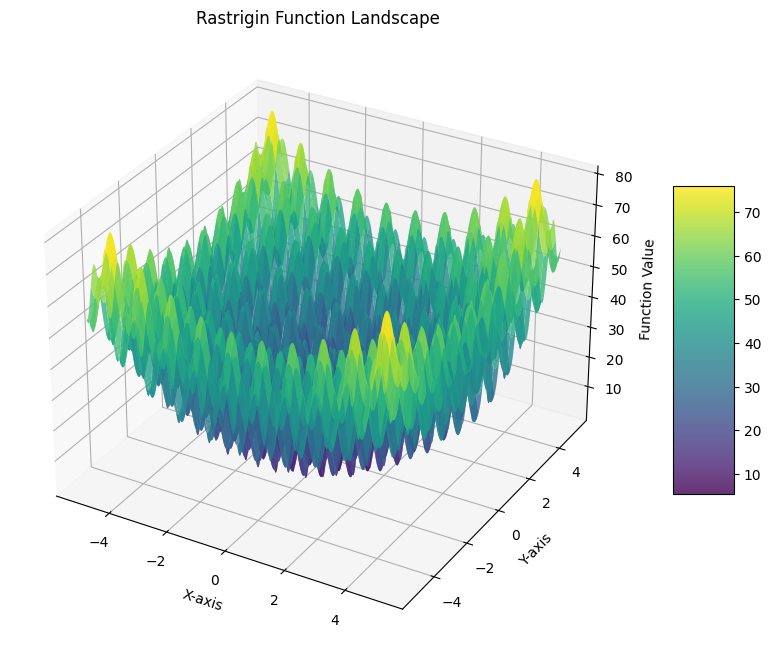

In [16]:
# Create a grid of x and y values
x = np.linspace(-5.12, 5.12, 400)  # Adjusted range for the Rastrigin function's typical domain
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)

# Calculate the fitness values for the grid
Z = rastrigin(X, Y)

# Plotting the 3D landscape for minimization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Customize the axes and title
ax.set_title('Rastrigin Function Landscape')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Function Value')

# Optional: Add a color bar for reference
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

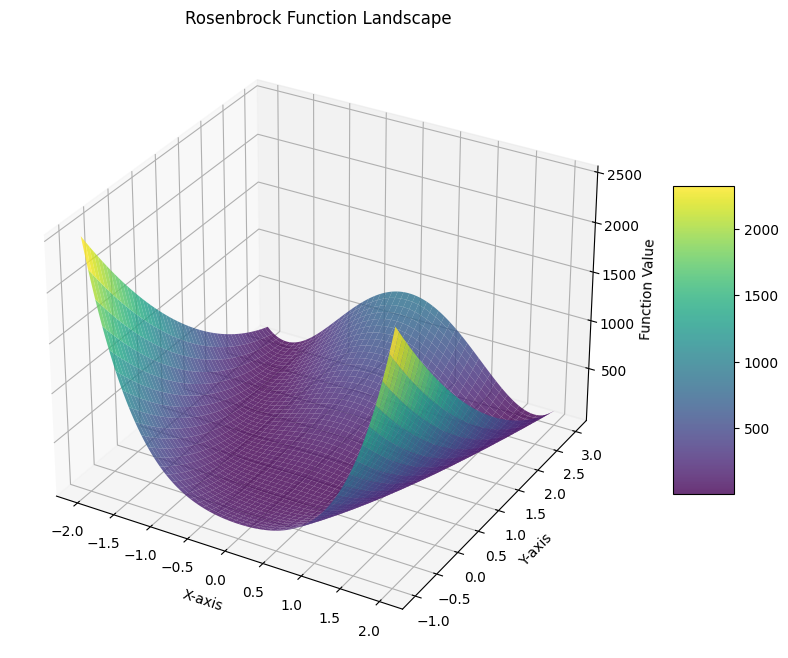

In [70]:
# Create a grid of x and y values
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

# Calculate the fitness values for the grid
Z = rosenbrock(X, Y)

# Plotting the 3D landscape for minimization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Customize the axes and title
ax.set_title('Rosenbrock Function Landscape')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Function Value')

# Optional: Add a color bar for reference
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Since the solution vector is in $\R^2$ we make a contour plot for easier visualization.

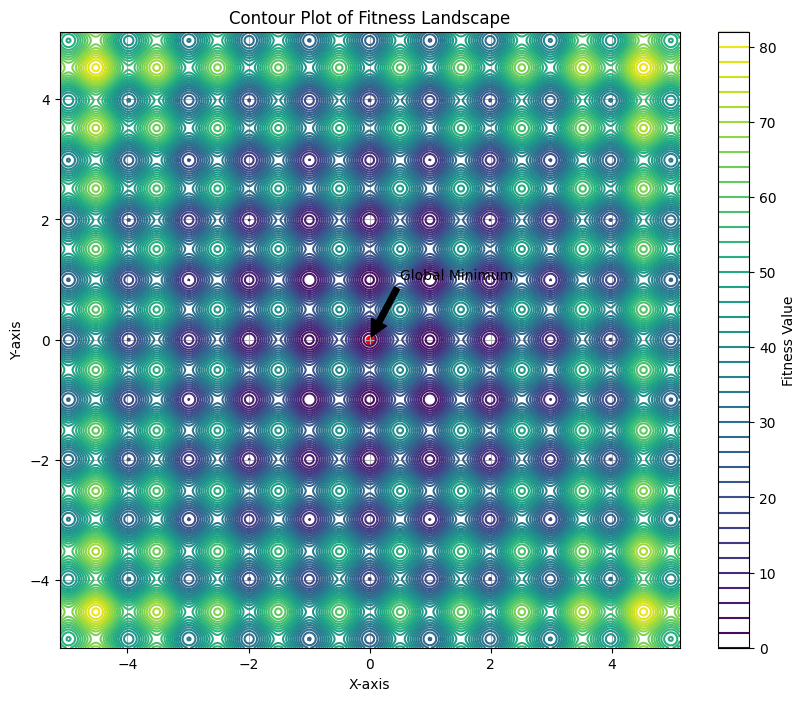

In [20]:
# Create a grid of x and y values
x = np.linspace(-5.12, 5.12, 400)  # Adjusted range for the Rastrigin function's typical domain
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)

# Calculate the fitness values for the grid using the negated function
Z = rastrigin(X, Y)

# Plotting the contour plot for the maximization problem
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Fitness Value')
plt.title('Contour Plot of Fitness Landscape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.scatter(0, 0, color='red', marker='o')
plt.annotate('Global Minimum', xy=(0, 0), xytext=(0.5, 1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()
plt.show()

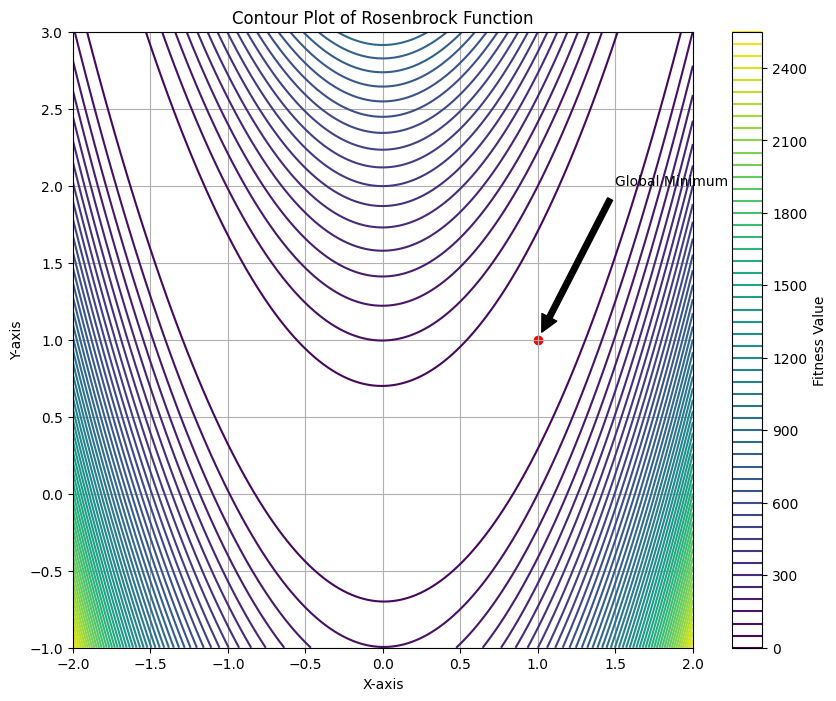

In [69]:
# Create a grid x and y
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

# Calculate the fitness values for the grid
Z = rosenbrock(X, Y)

# Plotting the contour plot for the Rosenbrock function
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Fitness Value')
plt.title('Contour Plot of Rosenbrock Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Mark the global minimum (at x_1 = 1, x_2 = 1, f(1,1) = 0)
plt.scatter(1, 1, color='red', marker='o')
plt.annotate('Global Minimum', xy=(1, 1), xytext=(1.5, 2), arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid()
plt.show()

For our algorithm we apply real enoding, we use DE crossover and mutation. For selection we apply a binary tournament. The code for this mechanisms is provided below:

In [97]:
# DE crossover and mutation
def de_crossover(parent, trial):
    dim = len(parent)
    offspring = np.copy(parent)
    
    # Generate a random set of indices for crossover (ensuring 3 crossover points)
    J = np.random.choice(range(dim), 3)
    
    for j in range(dim):
        if np.random.rand() < PC_REAL or j in J:
            offspring[j] = trial[j]  # Take from trial vector
    return offspring

def de_mutation(pop, F):
  indexes = [i for i in range(len(pop))]
  r_1, r_2, r_3 = np.random.choice(indexes, 3)
  return pop[r_3] + F * (pop[r_1] - pop[r_2])

# Real encoding crossover (SBX) and mutation
def sbx_crossover(p1, p2, nc):
  child1, child2 = np.zeros_like(p1), np.zeros_like(p2)
  for i in range(len(p1)):
    u = np.random.rand()
    if u <= 0.5:
      beta = (2 * u)**(1 / (nc + 1))
    else:
      beta = (1 / (2 * (1 - u)))**(1 / (nc + 1))
    child1[i] = 0.5 * ((1 + beta) * p1[i] + (1 - beta) * p2[i])
    child2[i] = 0.5 * ((1 - beta) * p1[i] + (1 + beta) * p2[i])
  return child1, child2

def pm_mutation(chrom, bounds, gen):
  # Select a random index in the chromosome
  mutation_index = np.random.randint(0, len(chrom))
  
  # Compute delta based on the selected allele
  delta = abs(min(chrom[mutation_index] - bounds[0], bounds[1] - chrom[mutation_index]) / (bounds[0] - bounds[1]))
  nm = 100 + gen
  delta_q = 0

  u = np.random.rand()
  
  # Apply the mutation formula based on delta
  if u < 0.5:
    delta_q = (2 * u + (1 - 2 * u) * (1 - delta) ** (nm + 1))**(1 / (nm + 1)) - 1
  else:
    delta_q = 1 - (2 * (1 - u) + (2 * (u - 0.5)) * (1 - delta) ** (nm + 1))**(1 / (nm + 1))
  
  # Apply mutation to the selected allele
  chrom[mutation_index] += delta_q * (bounds[1] - bounds[0])
  chrom[mutation_index] = np.clip(chrom[mutation_index], bounds[0], bounds[1])  # Ensure the value stays within bounds
    
  return chrom

def binary_tournament_selection(population, fitness):
    population_copy = population[:]  # Create a copy of the population to manipulate
    fitness_copy = fitness[:]        # Copy fitness array to manipulate
    
    while len(population_copy) > 1:
        winner_arr = []
        
        # Perform selection in pairs
        while len(population_copy) >= 2:
            # Randomly select two individuals
            first_idx, second_idx = np.random.choice(len(population_copy), size=2, replace=False)
            
            first_individual = population_copy[first_idx]
            second_individual = population_copy[second_idx]
            
            # Compare their fitness and select the winner
            if fitness_copy[first_idx] < fitness_copy[second_idx]:
                winner_arr.append(first_individual)
            else:
                winner_arr.append(second_individual)
            
            # Remove both individuals from the population
            del population_copy[max(first_idx, second_idx)]
            del fitness_copy[max(first_idx, second_idx)]
            del population_copy[min(first_idx, second_idx)]
            del fitness_copy[min(first_idx, second_idx)]

        # If odd number of individuals, automatically advance the last individual
        if len(population_copy) == 1:
            winner_arr.append(population_copy[0])
        
        # Set the population for the next round
        population_copy = winner_arr
        fitness_copy = [fitness[i] for i in range(len(population_copy))]

    # Return the last remaining winner
    return population_copy[0]

We define a simple genetic algorithm which consists on the following steps: 
1. Randomly initialize the a population with the specified bounds, decision variables and population size.
2. Initialize a loop with the specified number of generations:

   3.1. Calculate the fitness of each individual using a penalization function to handle constraints.

   3.2. Select the parents of the next generation based on their fitness using binary tournament selection.

   3.3. If probabilities are met, crossover the two parent to make two children, if not, the parents become the children of the next generation.

   3.4. If probabilities are met, mutate the children generated in the step before.

   3.5. Now the new population is the two children generated by the steps before.

   3.6. Track the best fitness of the current generation and store it.

   3.7. Check for stagnation, if no significative changehas been made in the last 5 generations (below a specified threshold of $1\times10^{-6}$), then early stop the process.
   
3. Return the convergence array, an array with the best fitness per generation and the solution achieved by the algorithm.

In [98]:
# Genetic Algorithm framework
def genetic_algorithm(fitness_function, bounds, dim, F=20, ineq_constraints=[], eq_constraints=[], con1=4, con2=3, beta=1, gamma=2, n_generations=100, pop_size=100, stop_threshold=1e-6, stagnation_generations=5, verbose=False):
    # Create initial population as real values
    population = [np.random.uniform(bounds[0], bounds[1], dim) for _ in range(pop_size)]
    
    if verbose:
        print(f'Original population: {population}')

    best_fitness_per_gen = []
    
    for gen in range(n_generations):
        # Clip the values of the real population to ensure they stay within bounds
        real_population = [np.clip(ind, bounds[0], bounds[1]) for ind in population]

        if verbose:
            print(f'Clipped population (generation {gen + 1}): {real_population}')

        # Evaluate fitness using penalty function
        fitness = []
        for individual in real_population:
            G_i = []
            H_i = []
            for constraint in ineq_constraints:
                G_i.append(max(0, constraint(individual))**beta)
            for constraint in eq_constraints:
                H_i.append(np.abs(constraint(individual))**gamma)

            fitness.append(fitness_function(individual[0], individual[1]) - (con1 * np.sum(G_i) + con2 * np.sum(H_i)))
    
        new_population = []
        for _ in range(pop_size // 2):
            p1 = binary_tournament_selection(population, fitness)
            p2 = binary_tournament_selection(population, fitness)
            if np.random.rand() < PC_REAL:
                c1 = de_crossover(p1, p2)
                c2 = de_crossover(p1, p2)
            else:
                c1, c2 = p1, p2
            if np.random.rand() < PM_REAL:
                c1 = de_mutation(population, F)
                c2 = de_mutation(population, F)
            new_population.extend([c1, c2])
        population = new_population

        # Track best fitness
        best_fitness = min(fitness)
        best_solution_index = fitness.index(best_fitness)
        best_solution = real_population[best_solution_index]
        best_fitness_per_gen.append(best_fitness)

        if verbose:
            print(f"Generation {gen + 1}, Best Fitness: {best_fitness}")

        # Check for stagnation (early stopping)
        if gen >= stagnation_generations:
            recent_fitness = best_fitness_per_gen[-stagnation_generations:]
            fitness_change = max(recent_fitness) - min(recent_fitness)

            if fitness_change < stop_threshold and verbose:
                print(f"Early stopping at generation {gen + 1} due to insufficient improvement.")
                break

    return best_fitness_per_gen, best_solution

Finally, we apply the GA over the problems.

In [99]:
rast_fit_de, rast_de_ga_result = genetic_algorithm(
  rastrigin,
  BOUNDS,
  2,
  F=10
)

print(f'Solution found in: {rast_de_ga_result}, Fitness: {min(rast_fit_de)}')

Solution found in: [-0.00881748 -0.99704434], Fitness: 1.0112424329712848


For better visualization, we plot the achieved solution in the contour plot next to the global minimum.

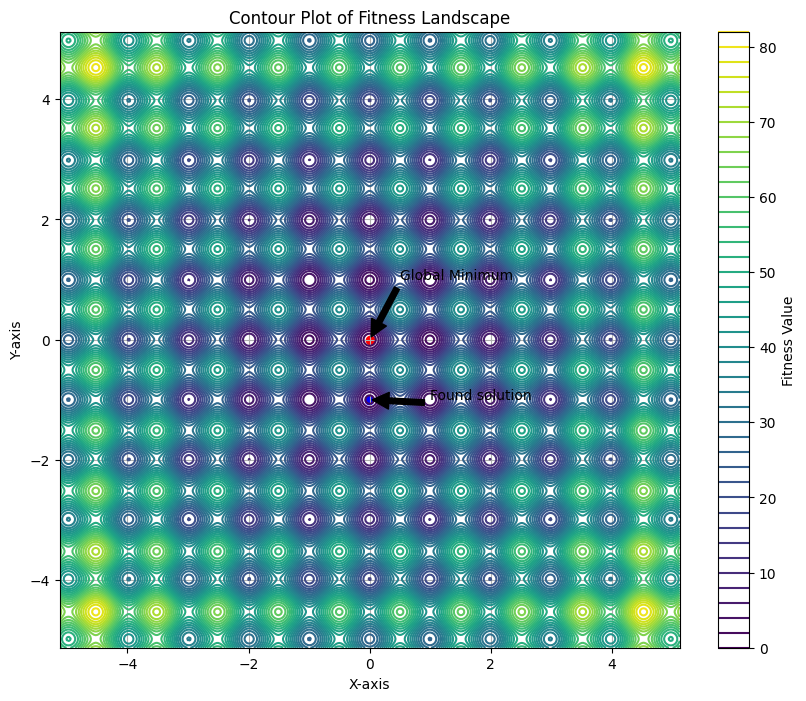

In [101]:
# Create a grid of x and y values
x = np.linspace(-5.12, 5.12, 400)  # Adjusted range for the Rastrigin function's typical domain
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)

# Calculate the fitness values for the grid using the negated function
Z = rastrigin(X, Y)

# Plotting the contour plot for the maximization problem
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Fitness Value')
plt.title('Contour Plot of Fitness Landscape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.scatter(0, 0, color='red', marker='o')
plt.scatter(rast_de_ga_result[0], rast_de_ga_result[1], color='blue', marker='o') 
plt.annotate('Global Minimum', xy=(0, 0), xytext=(0.5, 1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Found solution', xy=(rast_de_ga_result[0], rast_de_ga_result[1]), xytext=(1, -1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()
plt.show()

In [102]:
ros_fit_de, ros_de_ga_result = genetic_algorithm(
  rosenbrock,
  BOUNDS,
  2,
  F=10
)

print(f'Solution found in: {ros_de_ga_result}, Fitness: {min(ros_fit_de)}')

Solution found in: [1. 1.], Fitness: 0.0


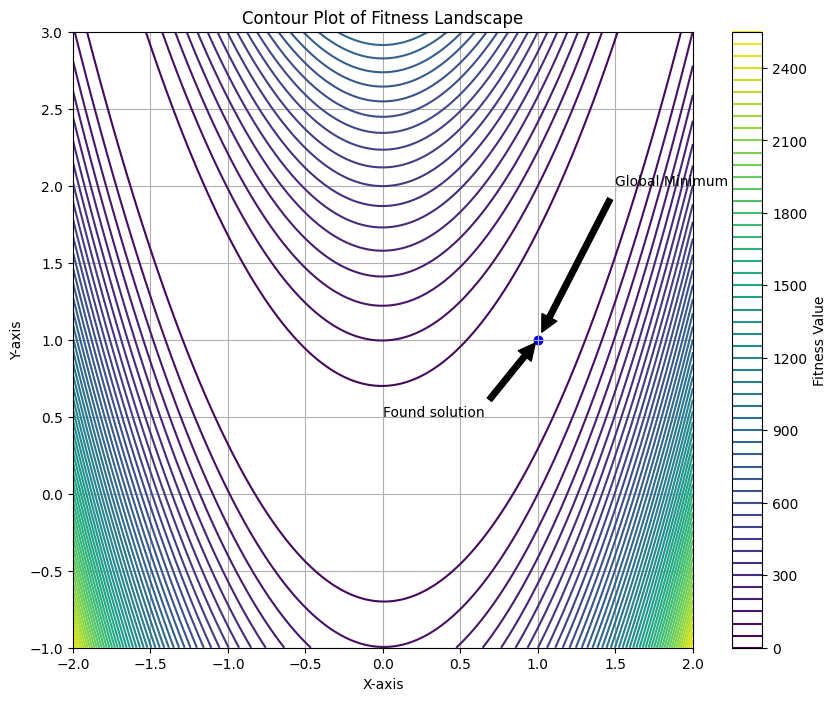

In [105]:
# Create a grid of x and y values
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

# Calculate the fitness values for the grid using the negated function
Z = rosenbrock(X, Y)

# Plotting the contour plot for the maximization problem
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Fitness Value')
plt.title('Contour Plot of Fitness Landscape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.scatter(1, 1, color='red', marker='o')  # Mark the global maximum
plt.scatter(ros_de_ga_result[0], ros_de_ga_result[1], color='blue', marker='o')  # Mark the global maximum
plt.annotate('Global Minimum', xy=(1, 1), xytext=(1.5, 2), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Found solution', xy=(ros_de_ga_result[0], ros_de_ga_result[1]), xytext=(0, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()
plt.show()

Running the conventional GA algorithm in the same functions.

In [106]:
# Genetic Algorithm framework
def genetic_algorithm(fitness_function, bounds, dim, ineq_constraints=[], eq_constraints=[], con1=4, con2=3, beta=1, gamma=2, n_generations=100, pop_size=100, stop_threshold=1e-6, stagnation_generations=5, verbose=False):
    # Create initial population as real values
    population = [np.random.uniform(bounds[0], bounds[1], dim) for _ in range(pop_size)]
    
    if verbose:
        print(f'Original population: {population}')

    best_fitness_per_gen = []
    
    for gen in range(n_generations):
        # Clip the values of the real population to ensure they stay within bounds
        real_population = [np.clip(ind, bounds[0], bounds[1]) for ind in population]

        if verbose:
            print(f'Clipped population (generation {gen + 1}): {real_population}')

        # Evaluate fitness using penalty function
        fitness = []
        for individual in real_population:
          G_i = []
          H_i = []
          for constraint in ineq_constraints:
              G_i.append(max(0, constraint(individual))**beta)
          for constraint in eq_constraints:
              H_i.append(np.abs(constraint(individual))**gamma)

          fitness.append(fitness_function(individual[0], individual[1]) - (con1 * np.sum(G_i) + con2 * np.sum(H_i)))
    
        new_population = []
        for _ in range(pop_size // 2):
            p1 = binary_tournament_selection(population, fitness)
            p2 = binary_tournament_selection(population, fitness)
            if np.random.rand() < PC_REAL:
                c1, c2 = sbx_crossover(p1, p2, N_C)
            else:
                c1, c2 = p1, p2
            if np.random.rand() < PM_REAL:
                c1 = pm_mutation(c1, bounds, gen)
                c2 = pm_mutation(c2, bounds, gen)
            new_population.extend([c1, c2])
        population = new_population

        # Track best fitness
        best_fitness = max(fitness)
        best_solution_index = fitness.index(best_fitness)
        best_solution = real_population[best_solution_index]
        best_fitness_per_gen.append(best_fitness)

        if verbose:
            print(f"Generation {gen + 1}, Best Fitness: {best_fitness}")

        # Check for stagnation (early stopping)
        if gen >= stagnation_generations:
            recent_fitness = best_fitness_per_gen[-stagnation_generations:]
            fitness_change = max(recent_fitness) - min(recent_fitness)

            if fitness_change < stop_threshold and verbose:
                print(f"Early stopping at generation {gen + 1} due to insufficient improvement.")
                break

    return best_fitness_per_gen, best_solution

In [107]:
rast_fit, rast_ga_result = genetic_algorithm(
  rastrigin,
  BOUNDS,
  2
)

print(f'Solution found in: {rast_ga_result}, Fitness: {min(rast_fit)}')

Solution found in: [-0.03348396  0.99493526], Fitness: 0.9949651965315436


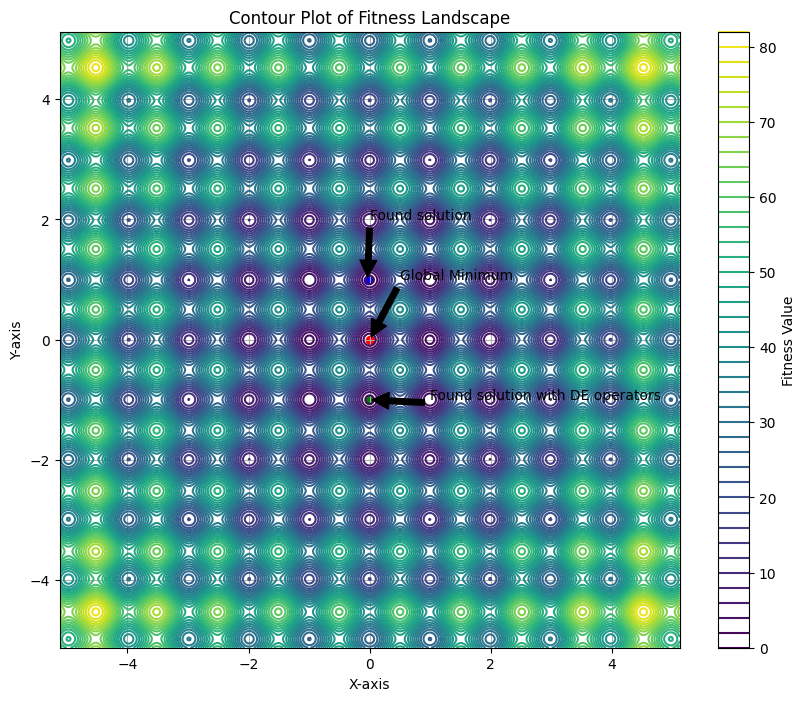

In [109]:
# Create a grid of x and y values
x = np.linspace(-5.12, 5.12, 400)  # Adjusted range for the Rastrigin function's typical domain
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)

# Calculate the fitness values for the grid using the negated function
Z = rastrigin(X, Y)

# Plotting the contour plot for the minimization problem
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Fitness Value')
plt.title('Contour Plot of Fitness Landscape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.scatter(0, 0, color='red', marker='o') 
plt.scatter(rast_ga_result[0], rast_ga_result[1], color='blue', marker='o') 
plt.scatter(rast_de_ga_result[0], rast_de_ga_result[1], color='green', marker='o') 
plt.annotate('Global Minimum', xy=(0, 0), xytext=(0.5, 1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Found solution', xy=(rast_ga_result[0], rast_ga_result[1]), xytext=(0, 2), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Found solution with DE operators', xy=(rast_de_ga_result[0], rast_de_ga_result[1]), xytext=(1, -1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()
plt.show()

In [110]:
ros_fit, ros_ga_result = genetic_algorithm(
  rosenbrock,
  BOUNDS,
  2
)

print(f'Solution found in: {ros_ga_result}, Fitness: {min(ros_fit)}')

Solution found in: [0.99345181 1.        ], Fitness: 1.2079841265265494e-05


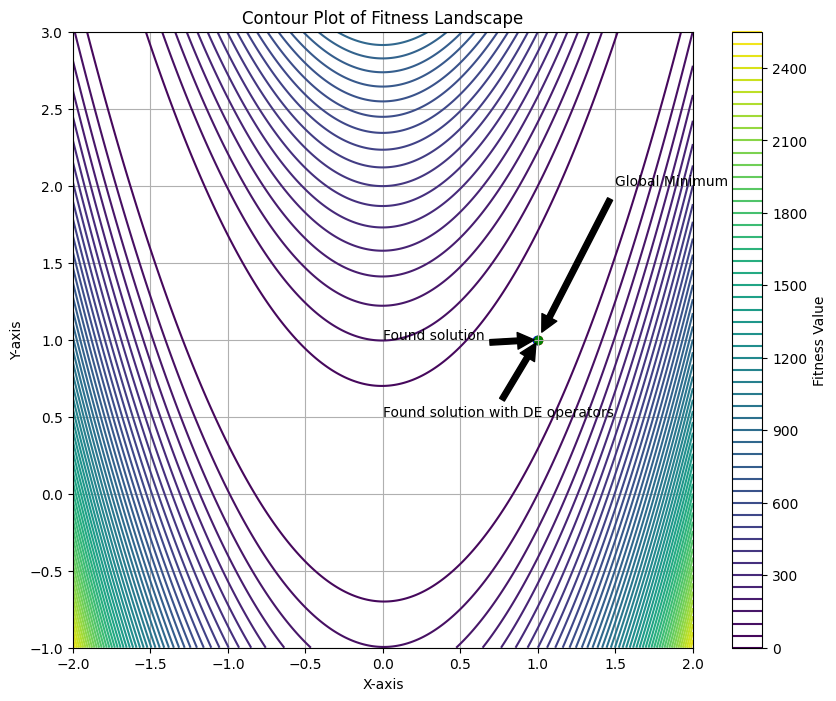

In [117]:
# Create a grid of x and y values
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

# Calculate the fitness values for the grid using the negated function
Z = rosenbrock(X, Y)

# Plotting the contour plot for the minimization problem
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Fitness Value')
plt.title('Contour Plot of Fitness Landscape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.scatter(1, 1, color='red', marker='o') 
plt.scatter(ros_ga_result[0], ros_ga_result[1], color='blue', marker='o') 
plt.scatter(ros_de_ga_result[0], ros_de_ga_result[1], color='green', marker='o') 
plt.annotate('Global Minimum', xy=(1, 1), xytext=(1.5, 2), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Found solution', xy=(ros_ga_result[0], ros_ga_result[1]), xytext=(0, 1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Found solution with DE operators', xy=(ros_de_ga_result[0], ros_de_ga_result[1]), xytext=(0, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()
plt.show()

We summarized the results on the following table: 

| Optimization                      | Time Convergence (s) | Point Found         | Fitness  |
|------------------------------------|----------------------|---------------------|----------|
| GA with DE operations for Rastrigin | 30.3                 | (-0.009, -0.997)    | 1.011    |
| GA with DE operations for Rosenbrock | 32.5                 | (1, 1)              | 0        |
| GA for Rastrigin                   | 34.6                 | (-0.033, 0.995)     | 0.995    |
| GA for Rosenbrock                  | 36.8                 | (0.993, 1)          | 1.208    |


By analyzing the table we can see that the GA with DE operations (hybrid approach) converges faster than the baseline GA in both Rastrigin and Rosenbrock functions. In terms of fitness, for Rastrigin the hybrid GA finds a point with a fitness value of 1.011, while the baseline GA finds a slightly better point with 0.995. For Rosenbrock, the hybrid GA finds the global minimum with a fitness value of 0, while the baseline GA's result has a fitness of 1.208, meaning the hybrid GA performs significantly better on this problem.

For the Rosenbrock function, the GA with DE operations is clearly the best, as it finds the global minimum with a fitness of 0, compared to the baseline GA which finds a less optimal point with a fitness of 1.208. For the Rastrigin function, the baseline GA performs slightly better in terms of fitness (0.995 compared to 1.011), but the hybrid GA converges faster (30.3 seconds vs 34.6 seconds). Thus, overall, the GA with DE operations appears to be the better algorithm, particularly for the Rosenbrock function, but the performance is close for the Rastrigin function.

The main differences lay in both convergence time and fitness:
* The hybrid GA with DE operations consistently converges faster for both problems.
* The hybrid GA performs better on the Rosenbrock function, while the baseline GA performs slightly better on the Rastrigin function.
* The differences in behavior show that the hybrid GA benefits from DE operators when solving the Rosenbrock function, but for Rastrigin, the performance is comparable.

Comparing algorithms based on a single execution is not enough. This is because both the GA and DE are stochastic algorithms, meaning the results can vary between runs due to their random nature (e.g., random initial population, crossover, mutation). To make a fair comparison, it is important to perform multiple independent runs of each algorithm (typically 30 or more) and collect the average fitness, average convergence time, and standard deviation to assess the performance more reliably.

To compare two or more randomized algorithms we recommend the following: 
1. Execute each algorithm at least 30 times to gather a representative sample of their performance.
2. Calculate the mean and standard deviation to understand both the average performance and the variability of each algorithm.
3. Apply tests like the t-test or Wilcoxon rank-sum test to determine if the differences in performance are statistically significant.
4. Use box plots, histograms, or fitness vs. time graphs to visualize the convergence behavior and spread of results across multiple runs.

By doing this, you can make a more robust and statistically sound comparison of the algorithms.